In [ ]:
!pip install qiskit
!pip install qiskit-aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 14.0 MB/s eta 0:00:00


Epoch 1/200, Cost: 0.025781249999999978, Theta: -0.970703125
Epoch 2/200, Cost: 0.011132812499999978, Theta: -0.94140625
Epoch 3/200, Cost: 0.011132812499999978, Theta: -0.98046875
Epoch 4/200, Cost: 0.004296874999999978, Theta: -1.0830078125
Epoch 5/200, Cost: 0.023828124999999978, Theta: -1.1123046875
Epoch 6/200, Cost: 0.04726562499999998, Theta: -1.1513671875
Epoch 7/200, Cost: 0.05800781249999998, Theta: -1.146484375
Epoch 8/200, Cost: 0.04921874999999998, Theta: -1.17578125
Epoch 9/200, Cost: 0.06386718749999998, Theta: -1.126953125
Epoch 10/200, Cost: 0.05996093749999998, Theta: -1.09765625
Epoch 11/200, Cost: 0.04531249999999998, Theta: -1.0830078125
Epoch 12/200, Cost: 0.028710937499999978, Theta: -1.1513671875
Epoch 13/200, Cost: 0.05898437499999998, Theta: -1.1513671875
Epoch 14/200, Cost: 0.05410156249999998, Theta: -1.126953125
Epoch 15/200, Cost: 0.04335937499999998, Theta: -1.1318359375
Epoch 16/200, Cost: 0.05898437499999998, Theta: -1.0537109375
Epoch 17/200, Cost: 0.0

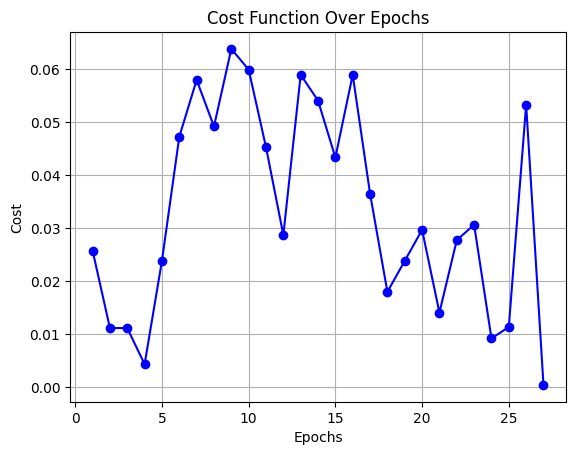

Trained Theta: -1.0146484375


In [ ]:
from qiskit import QuantumCircuit, Aer, transpile, assemble, execute
import numpy as np
import matplotlib.pyplot as plt

def create_quantum_circuit(theta):
    circuit = QuantumCircuit(1, 1)
    circuit.h(0)  # Hadamard gate
    circuit.ry(theta, 0)  # RY gate with parameter theta
    circuit.measure(0, 0)
    return circuit

def simulate_quantum_circuit(circuit, shots=1024):
    simulator = Aer.get_backend('qasm_simulator')
    compiled_circuit = transpile(circuit, simulator)
    result = execute(compiled_circuit, simulator, shots=shots).result()
    counts = result.get_counts(compiled_circuit)
    return counts

def parameter_shift(theta, target, shots=1024, delta=0.001, learning_rate=0.01):
    forward_circuit = create_quantum_circuit(theta + delta)
    backward_circuit = create_quantum_circuit(theta - delta)

    forward_counts = simulate_quantum_circuit(forward_circuit, shots)
    backward_counts = simulate_quantum_circuit(backward_circuit, shots)

    forward_expectation = forward_counts.get('0', 0) / shots
    backward_expectation = backward_counts.get('0', 0) / shots

    gradient = (forward_expectation - backward_expectation) / (2 * delta)

    return theta - learning_rate * gradient

def train_quantum_sensor(target, epochs=200, convergence_threshold=0.01):
    theta = -1.0
    # Lists to store data for final plot
    epochs_list = []
    cost_values = []

    for epoch in range(epochs):
        circuit = create_quantum_circuit(theta)
        counts = simulate_quantum_circuit(circuit)

        # Evaluate the cost function (simple example)
        cost = np.abs(counts.get('0', 0) / 1024 - target)

        # Update theta using the parameter-shift rule
        theta = parameter_shift(theta, convergence_threshold)  # Pass convergence threshold here

        # Append data for final plot
        epochs_list.append(epoch + 1)
        cost_values.append(cost)

        # Print numbers
        print(f"Epoch {epoch + 1}/{epochs}, Cost: {cost}, Theta: {theta}")

        # Check for convergence
        if cost < convergence_threshold:
            print(f"Converged at epoch {epoch + 1} with cost {cost}")
            break

    # Final plot
    plt.plot(epochs_list, cost_values, marker='o', linestyle='-', color='b')
    plt.title('Cost Function Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.grid(True)
    plt.show()

    return theta
# Example usage
target_value = 0.9  # Replace with your target value
trained_theta = train_quantum_sensor(target_value, convergence_threshold=0.0005
)
print(f"Trained Theta: {trained_theta}")